# Covid-19 Tracker for Spain
https://cnecovid.isciii.es/covid19/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from funcs import *
import plotly.express as px
import plotly.graph_objects as go

## Data Gathering & Cleaning

Covid Dataset

In [2]:
data = get_data()
data.head()

,province,sex,age,date,cases,hospitalizations,icu,deaths
12720,A,H,0s,2020-01-09,0,0,0,0
12721,A,H,10s,2020-01-09,0,0,0,0
12722,A,H,20s,2020-01-09,0,0,0,0
12723,A,H,30s,2020-01-09,0,0,0,0
12724,A,H,40s,2020-01-09,0,0,0,0


In [3]:
data = get_waves(get_sma7,data)
data.head()

,province,sex,age,date,cases,hospitalizations,icu,deaths,wave
12720,A,H,0s,2020-01-09,0,0,0,0,1
12721,A,H,10s,2020-01-09,0,0,0,0,1
12722,A,H,20s,2020-01-09,0,0,0,0,1
12723,A,H,30s,2020-01-09,0,0,0,0,1
12724,A,H,40s,2020-01-09,0,0,0,0,1


In [4]:
data.tail()

,province,sex,age,date,cases,hospitalizations,icu,deaths,wave
1367395,ZA,NC,50s,2022-05-09,0,0,0,0,6
1367396,ZA,NC,60s,2022-05-09,0,0,0,0,6
1367397,ZA,NC,70s,2022-05-09,0,0,0,0,6
1367398,ZA,NC,80+,2022-05-09,0,0,0,0,6
1367399,ZA,NC,NC,2022-05-09,0,0,0,0,6


Export to .csv

In [5]:
data.to_csv('../data/covid_19_spain.csv', sep=';', index = False)

# Time series visualization

In [3]:
data = pd.read_csv('../data/covid_19_spain.csv', sep = ';')
pop = pd.read_csv('../data/population_spain_10s.csv')
prov = pd.read_csv('../data/provincias.csv')

In [3]:
ccaa_map = prov.set_index('codigoProvincia').codigoCCAA
data['autonomousCommunity'] = data.province.str.strip().replace(ccaa_map)

In [4]:
data.head()

,province,sex,age,date,cases,hospitalizations,icu,deaths,wave,autonomousCommunity
0,A,H,0s,2020-01-09,0,0,0,0,1,VC
1,A,H,10s,2020-01-09,0,0,0,0,1,VC
2,A,H,20s,2020-01-09,0,0,0,0,1,VC
3,A,H,30s,2020-01-09,0,0,0,0,1,VC
4,A,H,40s,2020-01-09,0,0,0,0,1,VC


### Time Series Visualization

In [6]:
age_series = get_sma7_by_age(data)

In [7]:
fig = px.line(
    age_series, 
    x="date", 
    y="dailyCases", 
    color='age',
    template = 'simple_white',
    title = 'Daily Cases of Covid-19 by Age in Spain, 7-day Simple Moving Average')
fig.show()

### Heatmap + totals

In [8]:
totals_age_wave = data.groupby(['age', 'wave'], as_index = False).sum()
mask = totals_age_wave.age != 'NC'
totals_age_wave = totals_age_wave[mask]
heatmap_age_wave_cases = pd.crosstab(totals_age_wave.wave, totals_age_wave.age, totals_age_wave.cases, aggfunc=sum, normalize = 'index')
totals_wave = totals_age_wave.groupby('wave', as_index=False).sum()

In [9]:
totals_wave

,wave,cases,hospitalizations,icu,deaths
0,1,248181,109501,9347,29482
1,2,1499507,111131,10494,21316
2,3,1469625,106670,11143,26015
3,4,558451,43481,5810,5540
4,5,1217689,45509,4924,6185
5,6,7082206,115382,8187,16407


Text(0.5, 1.0, 'Total Cases by Wave (Thousands)')

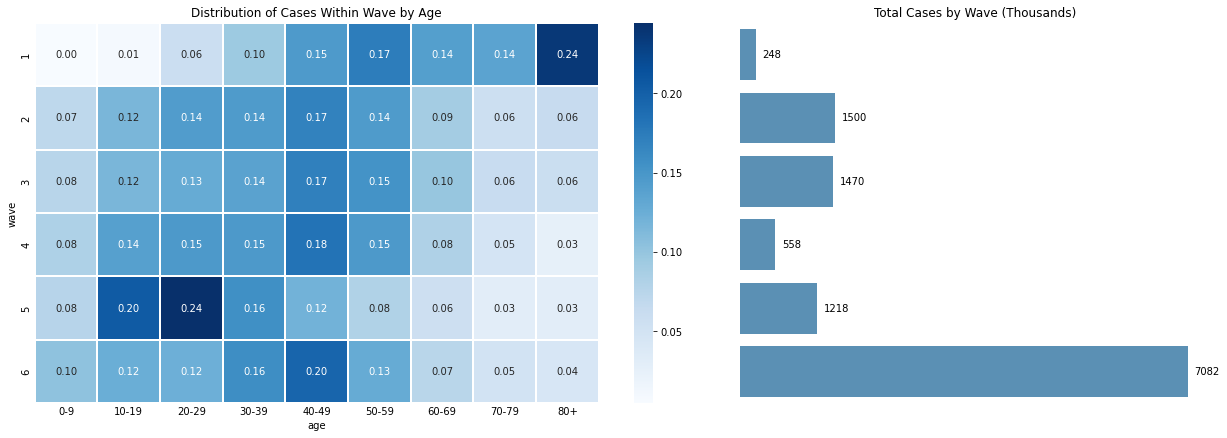

In [153]:
# figure and spacing
size_unit=np.array([1.7*1.77, 1])
fig, ax = plt.subplots(1, 2, figsize=7*size_unit, gridspec_kw={"width_ratios": (.6, .4)})
fig.subplots_adjust(wspace=0, hspace=0)
# heatmap
sns.heatmap(
    data = heatmap_age_wave, 
    annot=True, 
    linewidths=0.1, 
    cmap='Blues', 
    fmt='.2f', 
    ax = ax[0],
    )
# barplot
sns.barplot(
    data = totals_wave/1000, 
    x='cases', 
    y='wave', 
    orient = 'h', 
    color=sns.color_palette()[0], 
    ax=ax[1],
    alpha=0.8,
    )
# despine barplot
sns.despine(fig=fig, ax=ax[1], top=True, bottom=True, left=True, right=True)
# Axes styling
ax[0].tick_params(axis=u'both', which=u'both',length=0)
ax[1].tick_params(axis=u'both', which=u'both',length=0)
ax[1].set(
    ylabel=None,
    xlabel=None,
    yticklabels=[],
    xticklabels=[],
    xticks=[],
    )
# show labels
ax[1].bar_label(
    ax[1].containers[0],
    fmt='%.0f',
    padding=7,
    )
# titles
ax[0].set_title('Distribution of Cases Within Wave by Age')
ax[1].set_title('Total Cases by Wave (Thousands)')

### Within-Age Group distribution by Wave and Totals by age group

In [5]:
get_heatmap_data_age_norm(data, pop, 'cases')

wave,1,2,3,4,5,6
age,,,,,,
0s,0.000289,0.025832,0.027140,0.011252,0.022777,0.178655
10s,0.000466,0.035586,0.034787,0.016019,0.051086,0.181406
20s,0.003010,0.044240,0.038501,0.016863,0.061169,0.178834
30s,0.003962,0.036298,0.033822,0.013759,0.031860,0.187653
40s,0.004658,0.032698,0.032375,0.013117,0.018930,0.178168
50s,0.006135,0.030869,0.031948,0.011674,0.014080,0.128411
60s,0.006453,0.025039,0.026714,0.008480,0.012731,0.096932
70s,0.008631,0.021996,0.023476,0.006726,0.009386,0.091557
80+,0.020754,0.034263,0.031203,0.005064,0.013010,0.110094


In [13]:
totals_age_wave = data.groupby(['age', 'wave'], as_index = False).sum()
mask = totals_age_wave.age != 'NC'
totals_age_wave = totals_age_wave[mask]
a = pd.crosstab(totals_age_wave.wave, totals_age_wave.age, totals_age_wave.cases, aggfunc=sum)
total_pop = pop.groupby('age').population.sum().drop('total')
result = a/total_pop
result = result.T

In [9]:
totals_age = data.groupby('age').sum().drop('NC')

Text(0.5, 1.0, 'Total Population by Age Group')

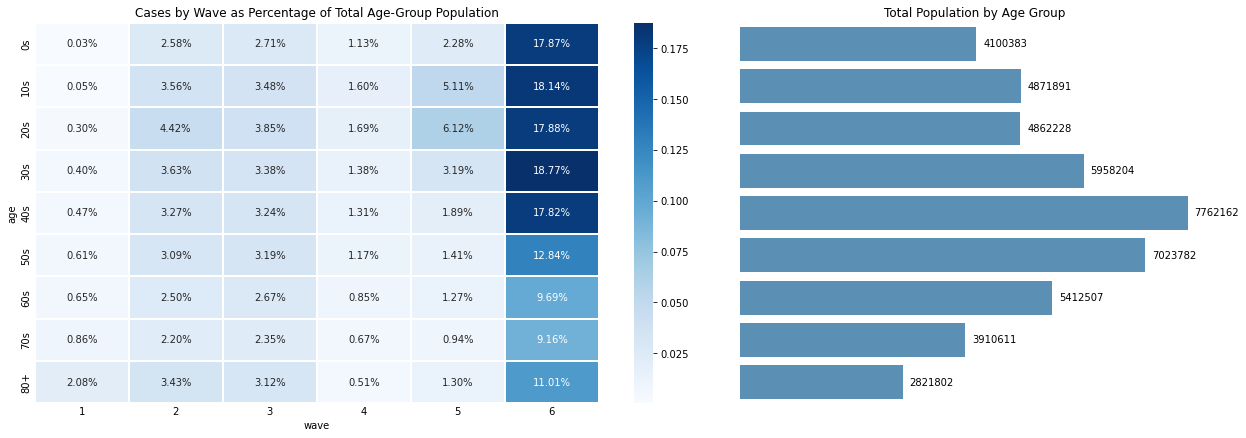

In [48]:
# figure and spacing
size_unit=np.array([1.7*1.77, 1])
fig, ax = plt.subplots(1, 2, figsize=7*size_unit, gridspec_kw={"width_ratios": (.6, .4)})
fig.subplots_adjust(wspace=0, hspace=0)
# heatmap
sns.heatmap(
    data = result, 
    annot=True, 
    linewidths=0.1, 
    cmap='Blues', 
    fmt='.2%', 
    ax = ax[0],
    )
# barplot
sns.barplot(
    data = total_pop.reset_index(), 
    x='population', 
    y='age', 
    orient = 'h', 
    color=sns.color_palette()[0], 
    ax=ax[1],
    alpha=0.8,
    )
# despine barplot
sns.despine(fig=fig, ax=ax[1], top=True, bottom=True, left=True, right=True)
# Axes styling
ax[0].tick_params(axis=u'both', which=u'both',length=0)
ax[1].tick_params(axis=u'both', which=u'both',length=0)
ax[1].set(
    ylabel=None,
    xlabel=None,
    yticklabels=[],
    xticklabels=[],
    xticks=[],
    )
# show labels
ax[1].bar_label(
    ax[1].containers[0],
    fmt='%.0f',
    padding=7,
    )
# titles
ax[0].set_title('Cases by Wave as Percentage of Total Age-Group Population')
ax[1].set_title('Total Population by Age Group')

### Hospitalizations to Cases and Hospitalization as % of total pop

In [23]:
totals_age_wave = data.groupby(['age', 'wave'], as_index = False).sum()
mask = totals_age_wave.age != 'NC'
totals_age_wave = totals_age_wave[mask]
cases = pd.crosstab(totals_age_wave.wave, totals_age_wave.age, totals_age_wave.cases, aggfunc=sum)
hosp = pd.crosstab(totals_age_wave.wave, totals_age_wave.age, totals_age_wave.hospitalizations, aggfunc=sum)
hosp_cases = hosp/cases
hosp_total_pop = hosp/total_pop

In [29]:
def plot_heatmap_ratios(heatmap_data1, heatmap_data2):
    # figure and spacing
    size_unit=np.array([1.7*1.77, 1])
    fig, ax = plt.subplots(1, 2, figsize=7*size_unit, gridspec_kw={"width_ratios": (.5, .5)})
    fig.subplots_adjust(wspace=0, hspace=0)
    # heatmap
    sns.heatmap(
        data = heatmap_data1, 
        annot=True, 
        linewidths=0.1, 
        cmap='Blues', 
        fmt='.2%', 
        ax = ax[0],
        )
    # barplot
    sns.heatmap(
        data = heatmap_data2, 
        annot=True, 
        linewidths=0.1, 
        cmap='Blues', 
        fmt='.2%', 
        ax = ax[1],
        )
    # despine barplot
    # Axes styling
    ax[0].tick_params(axis=u'both', which=u'both',length=0)
    ax[1].tick_params(axis=u'both', which=u'both',length=0)

    # titles
    ax[0].set_title('Hospitalizations by Wave as Percentage of Cases')
    ax[1].set_title('Hospitalizations by Wave as Percentage of Age-Group Population')
    return fig


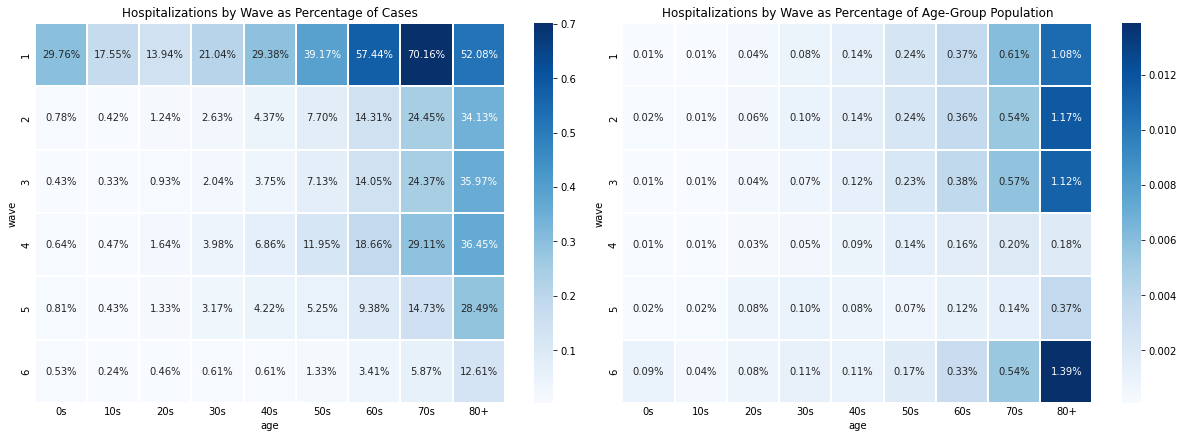

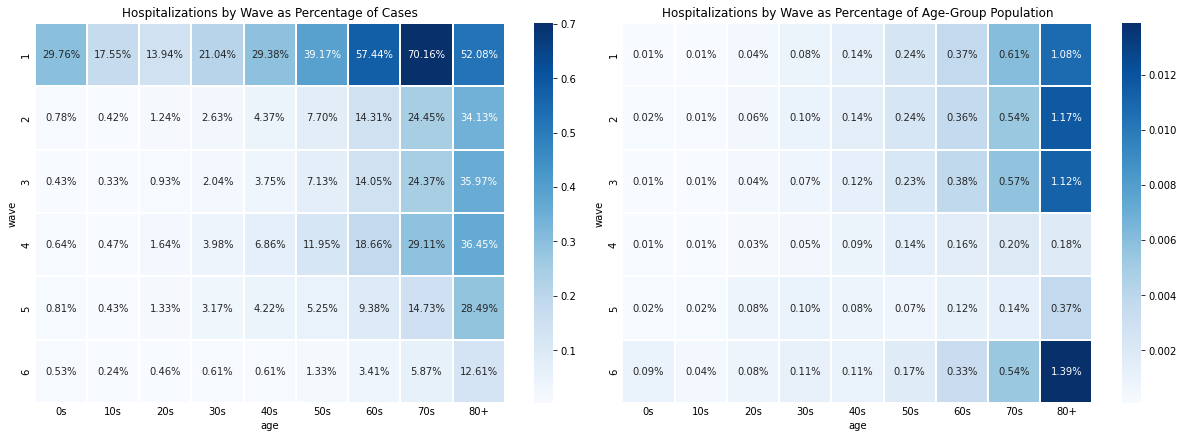

In [30]:
plot_heatmap_ratios(hosp_cases, hosp_total_pop)

----

## 4th Dashboard Heatmaps

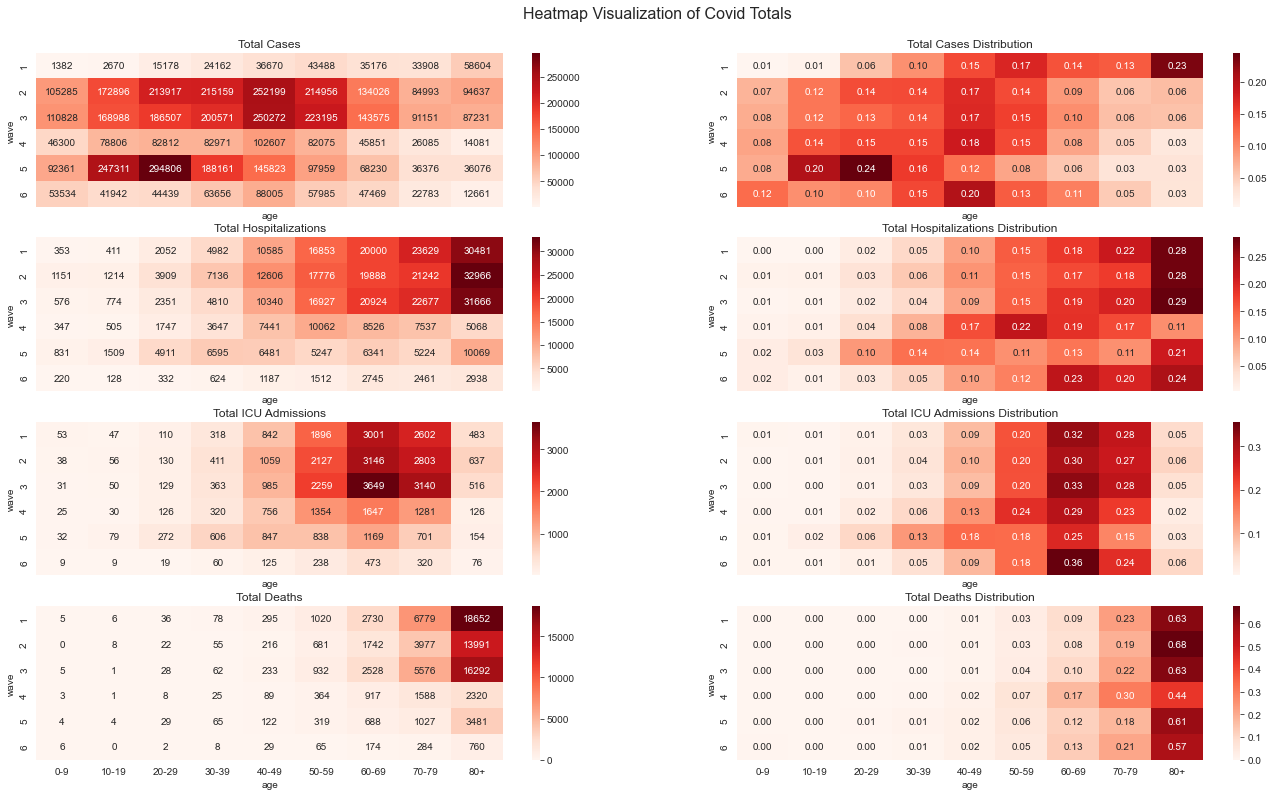

In [94]:
size_unit=np.array([1.77, 1])

# create figure
fig, axes = plt.subplots(4, 2, figsize = 13*size_unit, sharex=True)
fig.suptitle('Heatmap Visualization of Covid Totals', y=0.93)

# plot axes and set titles
sns.heatmap(totals.pivot('wave','age','cases'), cmap='Reds', ax=axes[0,0], annot=True, fmt="d")
axes[0,0].set_title('Total Cases')
sns.heatmap(totals.pivot('wave','age','cases_wave_pct'), cmap='Reds', ax=axes[0,1], annot=True, fmt=".2f")
axes[0,1].set_title('Total Cases Distribution')

sns.heatmap(totals.pivot('wave','age','hospitalizations'), cmap='Reds', ax=axes[1,0], annot=True, fmt="d")
axes[1,0].set_title('Total Hospitalizations')
sns.heatmap(totals.pivot('wave','age','hospitalizations_wave_pct'), cmap='Reds', ax=axes[1,1], annot=True, fmt=".2f")
axes[1,1].set_title('Total Hospitalizations Distribution')

sns.heatmap(totals.pivot('wave','age','icu'), cmap='Reds', ax=axes[2,0], annot=True, fmt="d")
axes[2,0].set_title('Total ICU Admissions')
sns.heatmap(totals.pivot('wave','age','icu_wave_pct'), cmap='Reds', ax=axes[2,1], annot=True, fmt=".2f")
axes[2,1].set_title('Total ICU Admissions Distribution')

sns.heatmap(totals.pivot('wave','age','deaths'), cmap='Reds', ax=axes[3,0], annot=True, fmt="d")
axes[3,0].set_title('Total Deaths')
sns.heatmap(totals.pivot('wave','age','deaths_wave_pct'), cmap='Reds', ax=axes[3,1], annot=True, fmt=".2f")
axes[3,1].set_title('Total Deaths Distribution')

plt.savefig('./fig/totals_heatmap.png', bbox_inches = 'tight')

## 5th Dashboard. Increases

masks for referincing multiindex

In [95]:
idxmask_observation_cases = df_increases.index.get_level_values('observation') == 'cases'
idxmask_wave_notfirst = df_increases.index.get_level_values('wave') != 1
colmask_wave_notone = df_increases.columns != 1
idxmask_wave_first = df_increases.index.get_level_values('wave') == 1
colmask_wave_one = df_increases.columns == 1

In [96]:
df_increases.loc[(idxmask_observation_cases, idxmask_wave_first), :] = np.nan
df_increases.loc[(idxmask_observation_cases, idxmask_wave_notfirst), colmask_wave_one] = np.nan

In [97]:
idxmask_observation_hospitalizations = df_increases.index.get_level_values('observation') == 'hospitalizations'
idxmask_observation_icu = df_increases.index.get_level_values('observation') == 'icu'
idxmask_observation_deaths = df_increases.index.get_level_values('observation') == 'deaths'

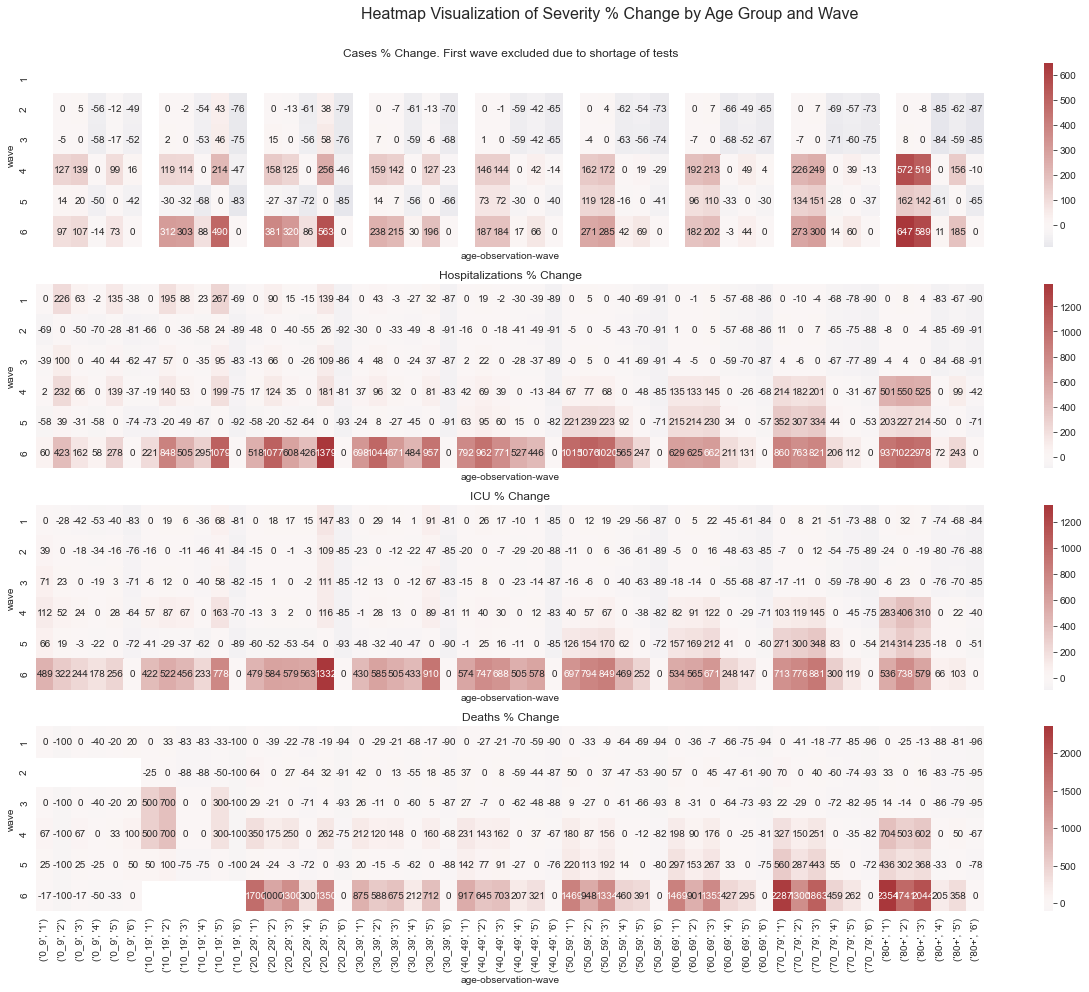

In [98]:
size_unit=np.array([1.77,1.3])

fig, axes = plt.subplots(4, 1, figsize = 12*size_unit, sharex=True)
fig.suptitle('Heatmap Visualization of Severity % Change by Age Group and Wave', y=0.93)

sns.heatmap(df_increases.loc[idxmask_observation_cases].transpose(), center = 0, cmap='vlag', annot=True, fmt = '.0f', ax=axes[0])
axes[0].set_title('Cases % Change. First wave excluded due to shortage of tests')
sns.heatmap(df_increases.loc[idxmask_observation_hospitalizations].transpose(), center = 0, cmap='vlag', annot=True, fmt = '.0f', ax=axes[1])
axes[1].set_title('Hospitalizations % Change')
sns.heatmap(df_increases.loc[idxmask_observation_icu].transpose(), center = 0, cmap='vlag', annot=True, fmt = '.0f', ax=axes[2])
axes[2].set_title('ICU % Change')
sns.heatmap(df_increases.loc[idxmask_observation_deaths].transpose(), center = 0, cmap='vlag', annot=True, fmt = '.0f', ax=axes[3])
axes[3].set_title('Deaths % Change')

for ax in axes.flat:
    labels = [item.get_text() for item in ax.get_xticklabels()]
    labels = [w.replace('-', '_', 1) for w in labels]
    labels = [w.replace('_deaths', '') for w in labels]
    labels = [(w.split('-')[0], w.split('-')[-1]) for w in labels]
    ax.set_xticklabels(labels)
    
plt.savefig('./fig/heatmap_pct_change.png', bbox_inches = 'tight')

#### Drafts
----

Deaths 2019

## SERIE TEMPORAL VACUNACION EDAD??
usar requests y un engine de ods para buscar constuir una funcion que construya un dataset con los datos de vacunacion

pd.read_csv('https://www.mscbs.gob.es/profesionales/saludPublica/ccayes/alertasActual/nCov/documentos/Informe_Comunicacion_20210819.ods')

In [ ]:
# waveday variable
covid['waveday'] = covid.groupby(['age','wave'])['date'].rank()